# Insights Airbnb New York City

### Import Packages

In [2]:
from IPython.display import Image
import pandas as pd
import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Read Data

In [7]:
df = pd.read_csv('airbnb_nyc_2019.csv')

#### Boroughs of New York City

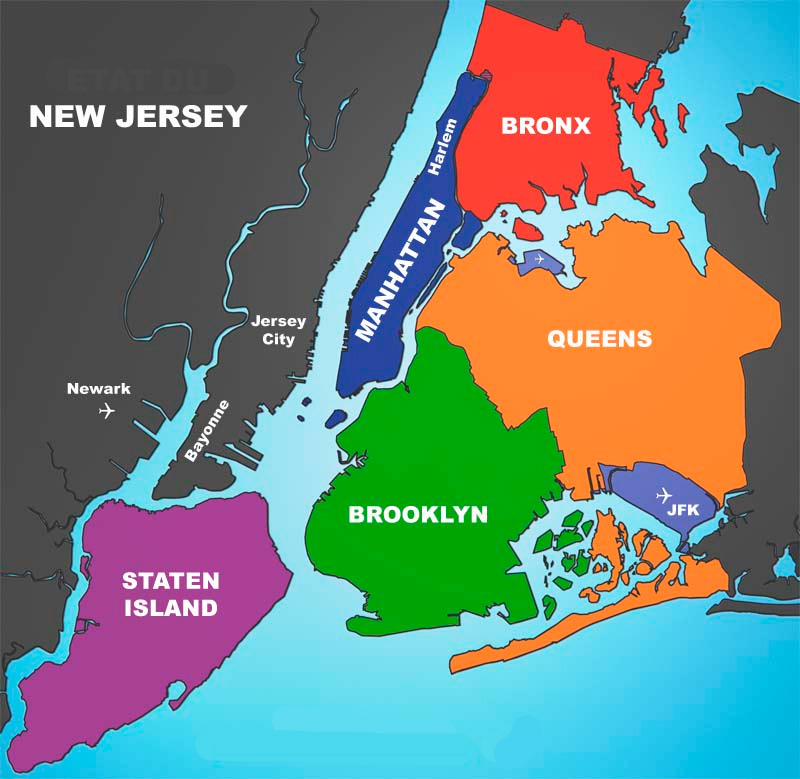

In [11]:
Image('nyc_boroughs.jpeg')

#### Properties Distribution on New York City

In [37]:
houses = df[['id', 'host_id', 'latitude', 'longitude', 'price']].copy()

houses['level'] = houses['price'].apply(lambda x: 0 if x < 80 else 1 if x < 120 else 2 if x < 200 else 3 if x < 500 else 4)

fig = px.scatter_mapbox(houses, lat='latitude', lon='longitude', color='price',size='level',color_continuous_scale=px.colors.cyclical.IceFire,size_max=4,zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()

### Understanding the Data

In [5]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington     40.65     -73.97   
1     Jennifer           Manhattan       Midtown     40.75     -73.98   
2    Elisabeth           Manhattan        Harlem     40.81     -73.94   
3  LisaRoxanne            Brooklyn  Clinton Hill     40.69     -73.96   
4        Laura           Manhattan   East Harlem     40.80     -73.94   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
df.describe()

id      host_id  latitude  longitude    price  minimum_nights  \
count    48895.00     48895.00  48895.00   48895.00 48895.00        48895.00   
mean  19017143.24  67620010.65     40.73     -73.95   152.72            7.03   
std   10983108.39  78610967.03      0.05       0.05   240.15           20.51   
min       2539.00      2438.00     40.50     -74.24     0.00            1.00   
25%    9471945.00   7822033.00     40.69     -73.98    69.00            1.00   
50%   19677284.00  30793816.00     40.72     -73.96   106.00            3.00   
75%   29152178.50 107434423.00     40.76     -73.94   175.00            5.00   
max   36487245.00 274321313.00     40.91     -73.71 10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           38843.00                        48895.00   
mean               23.27               1.37                            7.14   
std                44.55               1.68                           32.95   
min                 0.00               0.01                            1.00   
25%                 1.00               0.19                            1.00   
50%                 5.00               0.72                            1.00   
75%                24.00               2.02                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          48895.00  
mean             112.78  
std              131.62  
min                0.00  
25%                0.00  
50%               45.00  
75%              227.00  
max              365.00

### Checking Data Types

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# change the last_review data type
df['last_review'] = pd.to_datetime(df['last_review'])

### Looking for NA Values

In [9]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Fix NA Values

In [6]:
df['host_name'] = df[['host_id', 'host_name']].apply(lambda x: 'Manhattan Three' if x.host_id == 159156636 else
                                                               'Brooklyn Two' if x.host_id == 32722063 else x.host_name, axis=1)

df['host_name'] = df[['name', 'host_name']].apply(lambda x: 'Host of ' + x['name'] if x.host_name != x.host_name else x.host_name, axis=1)

df['name'] = df[['name', 'host_name']].apply(lambda x: 'Property of ' + x['host_name'] if x.name != x.name else x.name, axis=1)

df['reviews_per_month'] = df['reviews_per_month'].apply(lambda x: 0 if x != x else x)

df['last_review'] = df['last_review'].apply(lambda x: pd.to_datetime('2008-08-01') if x != x else x)

### Data Exploring

In [12]:
df[['price', 'neighbourhood_group']].groupby('neighbourhood_group').count()

price
neighbourhood_group       
Bronx                 1091
Brooklyn             20104
Manhattan            21661
Queens                5666
Staten Island          373

In [13]:
df[['price', 'neighbourhood_group']].groupby('neighbourhood_group').mean()

price
neighbourhood_group       
Bronx                87.50
Brooklyn            124.38
Manhattan           196.88
Queens               99.52
Staten Island       114.81

In [14]:
df[['price', 'neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood']).mean().sort_values('price', ascending=False).head(10)

price
neighbourhood_group neighbourhood           
Staten Island       Fort Wadsworth    800.00
                    Woodrow           700.00
Manhattan           Tribeca           490.64
Brooklyn            Sea Gate          487.86
Bronx               Riverdale         442.09
Staten Island       Prince's Bay      409.50
Manhattan           Battery Park City 367.56
                    Flatiron District 341.93
Staten Island       Randall Manor     336.00
Manhattan           NoHo              295.72

### Insights

#### Insight 1: Private rooms are more than 20% greater than shared rooms.

In [13]:
i1 = df[['room_type', 'price']].groupby('room_type').mean().reset_index(drop=False)
i1

room_type  price
0  Entire home/apt 211.79
1     Private room  89.78
2      Shared room  70.13

In [26]:
private_room_avg = h1.query("room_type == 'Private room'").reset_index(drop=True)['price'][0]
shared_room_avg = h1.query("room_type == 'Shared room'").reset_index(drop=True)['price'][0]
print(private_room_avg / shared_room_avg)

1.2802518625392187


##### True: Private rooms are 28% more expensive than shared rooms.

#### Insight 2: Most of the neighborhoods in the 10 with the highest average rental prices and with more than 20 properties are in Manhattan.

In [15]:
i2_a = df[['price', 'neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood']).mean().reset_index().sort_values('price', ascending=False)
i2_a.rename(columns={'price':'average_price'}, inplace=True)

i2_b = df[['price', 'neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood']).count().reset_index().sort_values('price', ascending=False)
i2_b.rename(columns={'price':'count'}, inplace=True)

df_i2 = pd.merge(i2_a, i2_b, on=['neighbourhood_group', 'neighbourhood'], how='inner').query('count > 20').reset_index(drop=True).head(20)
df_i2

neighbourhood_group       neighbourhood  average_price  count
0            Manhattan             Tribeca         490.64    177
1            Manhattan   Battery Park City         367.56     70
2            Manhattan   Flatiron District         341.93     80
3            Manhattan                NoHo         295.72     78
4            Manhattan                SoHo         287.10    358
5            Manhattan             Midtown         282.72   1545
6            Manhattan        West Village         267.68    768
7            Manhattan   Greenwich Village         263.41    392
8            Manhattan             Chelsea         249.74   1113
9            Manhattan    Theater District         248.01    288
10           Manhattan              Nolita         230.14    253
11           Manhattan  Financial District         225.49    744
12           Manhattan            Gramercy         222.75    338
13           Manhattan        Little Italy         222.07    121
14           Manhattan         Murray Hill         220.96    485
15            Brooklyn         Cobble Hill         211.93     99
16           Manhattan     Upper West Side         210.92   1971
17            Brooklyn    Brooklyn Heights         209.06    154
18           Manhattan      Hell's Kitchen         204.79   1958
19           Manhattan            Kips Bay         202.41    470

##### True: The first one taht is not in Manhattan is in Brooklyn and it is the 15th.

#### Insight 3: Properties that have never been reviewed are on average 10% cheaper.

In [6]:
df['reviews'] = df['number_of_reviews'].apply(lambda x: 'no' if x == 0 else 'yes')
df[['reviews', 'price']].groupby('reviews').median()

price
reviews       
no      120.00
yes     101.00

##### False: The average price of the properties that were never reviewed are greater than the price of those properties that were reviewed at least once.

### Answering the questions from the CEO

##### 1. What are the `ids` of the properties with the most expensive (daily) rent in the database?

In [28]:
df[['id', 'price']].sort_values('price', ascending=False).reset_index(drop=True)[0:3]

id  price
0   7003697  10000
1  13894339  10000
2  22436899  10000

##### 2. What are the `ids` of the properties with the cheapest (daily) rent in the database?

In [31]:
df[['id', 'price']].sort_values('price', ascending=True).reset_index(drop=True)[0:11]

id  price
0   20639914      0
1   20523843      0
2   20333471      0
3   20608117      0
4   18750597      0
5   20639792      0
6   21291569      0
7   20624541      0
8   20639628      0
9   21304320      0
10  20933849      0

##### 3. What are the `ids` of the most rented properties in the database?

In [18]:
df[['id', 'number_of_reviews']].sort_values('number_of_reviews', ascending=False).reset_index(drop=True).head()

id  number_of_reviews
0   9145202                629
1    903972                607
2    903947                597
3    891117                594
4  10101135                576

##### 4. What are the `ids` of the properties that had the longest ad available for rent in the database?

In [52]:
df[df['last_review'] > '2008-08-01'][['id', 'last_review']].sort_values('last_review', ascending=True).reset_index(drop=True).head(1)

id last_review
0  74860  2011-03-28

##### 5. What are the `ids` of the properties that had the shortest time with the ad available for rent in the database?

In [50]:
df[df['last_review'] > '2008-08-01'][['id', 'last_review']].sort_values('last_review', ascending=False).reset_index(drop=True).head(89)

id last_review
0   36455809  2019-07-08
1   33119863  2019-07-08
2   34244391  2019-07-08
3   34231172  2019-07-08
4   34204893  2019-07-08
..       ...         ...
84  19769912  2019-07-08
85  19786915  2019-07-08
86    100184  2019-07-08
87  30423106  2019-07-08
88  36390226  2019-07-08

[89 rows x 2 columns]

##### 6. Is the property with the highest rental value (daily) in the database the property with the most evaluations in the database?

In [53]:
df[['id', 'price', 'number_of_reviews']].sort_values('price', ascending=False).head()

id  price  number_of_reviews
9151    7003697  10000                  2
17692  13894339  10000                  5
29238  22436899  10000                  0
40433  31340283   9999                  0
12342   9528920   9999                  6

In [54]:
df[['id', 'price', 'number_of_reviews']].sort_values('number_of_reviews', ascending=False).head()

id  price  number_of_reviews
11759   9145202     47                629
2031     903972     49                607
2030     903947     49                597
2015     891117     49                594
13495  10101135     47                576

##### 7. Is the property that has the lowest minimum number of days for lease also the property that has the most expensive rent?

In [23]:
df[['id', 'minimum_nights', 'price']].sort_values('minimum_nights').head()

id  minimum_nights  price
0          2539               1    149
16078  12990578               1    100
16090  13001082               1     45
16096  13006002               1     70
16099  13007839               1    100

In [24]:
df[['id', 'minimum_nights', 'price']].sort_values('price', ascending=False).head()

id  minimum_nights  price
9151    7003697             100  10000
17692  13894339               5  10000
29238  22436899              30  10000
40433  31340283              30   9999
12342   9528920              99   9999

##### 8. What is the average minimum number of nights to rent a property?

In [25]:
df['minimum_nights'].mean()

7.029962163820431

##### 9. What are the `ids` of the properties with the lowest minimum number of nights to rent from the database?


In [56]:
df[['id', 'minimum_nights']].sort_values('minimum_nights').reset_index()[0:12720]

index        id  minimum_nights
0          0      2539               1
1      16078  12990578               1
2      16090  13001082               1
3      16096  13006002               1
4      16099  13007839               1
...      ...       ...             ...
12715  48525  36308658               1
12716  44379  34204173               1
12717   3099   1839231               1
12718   5225   3779230               1
12719  47417  35718438               1

[12720 rows x 3 columns]

##### 10. What is the `id` of the host that owns the most rented property in the database?

In [66]:
df[['host_id', 'number_of_reviews']].sort_values('number_of_reviews', ascending=False).reset_index(drop=True).head(1)

host_id  number_of_reviews
0  47621202                629

##### 11. What are the `ids` of the hosts that owns the least rented properties in the database?

In [65]:
df.sort_values('number_of_reviews', ascending=True)[['id', 'number_of_reviews']].reset_index(drop=True)[0:10052]

id  number_of_reviews
0      36487245                  0
1      22204856                  0
2      12650830                  0
3      31076156                  0
4       5826468                  0
...         ...                ...
10047  14140905                  0
10048  34415755                  0
10049  36270376                  0
10050  20010930                  0
10051  34415580                  0

[10052 rows x 2 columns]

##### 12. What is the `id` of the host that owns the property with the most reviews in the database?

In [91]:
df[['host_id', 'number_of_reviews']].sort_values('number_of_reviews', ascending=False).head()

host_id  number_of_reviews
11759  47621202                629
2031    4734398                607
2030    4734398                597
2015    4734398                594
13495  47621202                576

##### 13. What is the `id` of the host that has the largest number of properties registered in the database?

In [30]:
df[['host_id', 'calculated_host_listings_count']].sort_values('calculated_host_listings_count', ascending=False).reset_index(drop=True)[0:327]

host_id  calculated_host_listings_count
0    219517861                             327
1    219517861                             327
2    219517861                             327
3    219517861                             327
4    219517861                             327
..         ...                             ...
322  219517861                             327
323  219517861                             327
324  219517861                             327
325  219517861                             327
326  219517861                             327

[327 rows x 2 columns]

##### 14. What are the `ids` of the hosts that owns the properties with the last evaluations made in the database?

In [69]:
df[['host_id', 'last_review']].sort_values('last_review', ascending=False).reset_index(drop=True)[0:89]

host_id last_review
0    74162901  2019-07-08
1    42540127  2019-07-08
2   258536261  2019-07-08
3    59642348  2019-07-08
4    85773188  2019-07-08
..        ...         ...
84   54508926  2019-07-08
85   86892032  2019-07-08
86     526653  2019-07-08
87  228415932  2019-07-08
88  267932490  2019-07-08

[89 rows x 2 columns]

##### 15. What is the `id` of the host that has the most active properties in the database?

In [32]:
df[df['availability_365'] > 0][['host_id', 'calculated_host_listings_count']].groupby('host_id').count().sort_values('calculated_host_listings_count', ascending=False).head()

calculated_host_listings_count
host_id                                  
219517861                             327
107434423                             232
30283594                              121
12243051                               96
137358866                              92

##### 16. Is the host that owns the most real estate properties the host that also has the most reviews?

In [33]:
df[['host_id', 'calculated_host_listings_count']].groupby('host_id').count().sort_values('calculated_host_listings_count', ascending=False).head()

calculated_host_listings_count
host_id                                  
219517861                             327
107434423                             232
30283594                              121
137358866                             103
16098958                               96

In [34]:
df[['host_id', 'number_of_reviews']].groupby('host_id').sum().sort_values('number_of_reviews', ascending=False).head()

number_of_reviews
host_id                    
37312959               2273
344035                 2205
26432133               2017
35524316               1971
40176101               1818

##### 17. Which category has the most properties in the database?

In [35]:
df[['room_type', 'id']].groupby('room_type').count().sort_values('id', ascending=False).head()

id
room_type             
Entire home/apt  25409
Private room     22326
Shared room       1160

##### 18. Which category has the least properties in the database?

In [36]:
df[['room_type', 'id']].groupby('room_type').count().sort_values('id', ascending=True).head()

id
room_type             
Shared room       1160
Private room     22326
Entire home/apt  25409

##### 19. Is `Manhattan` the region that has the most active properties for rent in the `Private room` category?

In [37]:
df.query("room_type == 'Private room'")[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count().sort_values('id', ascending=False)

id
neighbourhood_group       
Brooklyn             10132
Manhattan             7982
Queens                3372
Bronx                  652
Staten Island          188

##### 20. Which property category has the highest average availability time to be rented in the `Bronx` region? Consider only active properties.

In [38]:
df.query("neighbourhood_group == 'Bronx' and availability_365 > 0")[['room_type', 'availability_365']].groupby('room_type').mean().sort_values('availability_365', ascending=False)

availability_365
room_type                        
Private room               204.59
Entire home/apt            188.31
Shared room                185.06

##### 21. Which active property category has the highest rental value (daily) in the `Manhattan` region?

In [39]:
df.query("neighbourhood_group == 'Manhattan' and availability_365 > 0")[['room_type', 'price']].sort_values('price', ascending=False).reset_index(drop=True).head()

room_type  price
0  Entire home/apt  10000
1     Private room   9999
2  Entire home/apt   9999
3  Entire home/apt   8500
4  Entire home/apt   7703

In [40]:
df.query("neighbourhood_group == 'Manhattan' and availability_365 > 0")[['room_type', 'price']].groupby('room_type').mean().sort_values('price', ascending=False)

price
room_type             
Entire home/apt 268.22
Private room    127.97
Shared room      84.52

##### 22. Is the property category “Private Room“ the category that is available for the longest time?

In [41]:
df[['room_type', 'availability_365']].groupby('room_type').mean().sort_values('availability_365', ascending=False)

availability_365
room_type                        
Shared room                162.00
Entire home/apt            111.92
Private room               111.20

##### 23. Which property category is available for rent the longest, on average?

In [42]:
df[['room_type', 'availability_365']].groupby('room_type').mean().sort_values('availability_365', ascending=False)

availability_365
room_type                        
Shared room                162.00
Entire home/apt            111.92
Private room               111.20

##### 24. Is the category of property that has the least amount of time available for rent, on average, the category that has, on average, the lowest rent (daily)?

In [43]:
df[['room_type', 'availability_365', 'price']].groupby('room_type').mean().sort_values('availability_365', ascending=True)

availability_365  price
room_type                               
Private room               111.20  89.78
Entire home/apt            111.92 211.79
Shared room                162.00  70.13

In [44]:
df[['room_type', 'availability_365', 'price']].groupby('room_type').mean().sort_values('price', ascending=True)

availability_365  price
room_type                               
Shared room                162.00  70.13
Private room               111.20  89.78
Entire home/apt            111.92 211.79

##### 25. Is the property category `Entire home/apt` the category that has, on average, the highest rental value?


In [45]:
df[['room_type', 'price']].groupby('room_type').mean().sort_values('price', ascending=False)

price
room_type             
Entire home/apt 211.79
Private room     89.78
Shared room      70.13

##### 26. Is the property category `Entire home/apt` the category that has, on average, the fewest rents?

In [46]:
df[['room_type', 'number_of_reviews']].groupby('room_type').mean().sort_values('number_of_reviews', ascending=False)

number_of_reviews
room_type                         
Private room                 24.11
Entire home/apt              22.84
Shared room                  16.60

##### 27. Is the `Private Room` property category in the Manhattan area, on average, the category that has the lowest rental value compared to other categories in the same region?

In [47]:
df.query("neighbourhood_group == 'Manhattan'")[['room_type', 'price']].groupby('room_type').mean().sort_values('price')

price
room_type             
Shared room      88.98
Private room    116.78
Entire home/apt 249.24

##### 28. Which region has the largest number of properties?

In [48]:
df[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count().sort_values('id', ascending=False)

id
neighbourhood_group       
Manhattan            21661
Brooklyn             20104
Queens                5666
Bronx                 1091
Staten Island          373

##### 29. Which region has the least amount of properties?

In [49]:
df[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count().sort_values('id', ascending=True)

id
neighbourhood_group       
Staten Island          373
Bronx                 1091
Queens                5666
Brooklyn             20104
Manhattan            21661

##### 30. Is the region that has the largest number of properties also the region that has the most leased properties?

In [50]:
df[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count().sort_values('id', ascending=False)

id
neighbourhood_group       
Manhattan            21661
Brooklyn             20104
Queens                5666
Bronx                 1091
Staten Island          373

In [51]:
df[['id', 'number_of_reviews', 'neighbourhood_group', 'neighbourhood']].sort_values('number_of_reviews', ascending=False).head()

id  number_of_reviews neighbourhood_group neighbourhood
11759   9145202                629              Queens       Jamaica
2031     903972                607           Manhattan        Harlem
2030     903947                597           Manhattan        Harlem
2015     891117                594           Manhattan        Harlem
13495  10101135                576              Queens       Jamaica

In [52]:
df[['number_of_reviews', 'neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group']).mean().sort_values('number_of_reviews', ascending=False)

number_of_reviews
neighbourhood_group                   
Staten Island                    30.94
Queens                           27.70
Bronx                            26.00
Brooklyn                         24.20
Manhattan                        20.99

##### 31. Which region has the least amount of leased properties within the database?

In [53]:
df[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count().sort_values('id', ascending=True)

id
neighbourhood_group       
Staten Island          373
Bronx                 1091
Queens                5666
Brooklyn             20104
Manhattan            21661

##### 32. Is the `Manhattan` region the region that has, on average, the highest (daily) rents within the database?

In [54]:
df[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean().sort_values('price', ascending=False)

price
neighbourhood_group       
Manhattan           196.88
Brooklyn            124.38
Staten Island       114.81
Queens               99.52
Bronx                87.50

##### 33. Is the `Queens` region the region that has, on average, the lowest (daily) rents within the database?

In [55]:
df[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean().sort_values('price', ascending=True)

price
neighbourhood_group       
Bronx                87.50
Queens               99.52
Staten Island       114.81
Brooklyn            124.38
Manhattan           196.88

##### 34. Which region has, on average, the properties with the lowest rents within the database?

In [56]:
df[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean().sort_values('price', ascending=True)

price
neighbourhood_group       
Bronx                87.50
Queens               99.52
Staten Island       114.81
Brooklyn            124.38
Manhattan           196.88

##### 35. Which region has the properties that are, on average, less available for rent? That is, are they rented faster on average?

In [57]:
df[['neighbourhood_group', 'availability_365']].groupby('neighbourhood_group').mean().sort_values('availability_365', ascending=True)

availability_365
neighbourhood_group                  
Brooklyn                       100.23
Manhattan                      111.98
Queens                         144.45
Bronx                          165.76
Staten Island                  199.68

##### 36. Which neighborhood has the most active rental properties?

In [58]:
df[['neighbourhood', 'neighbourhood_group','id']].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values('id', ascending=False).head()

id
neighbourhood_group neighbourhood           
Brooklyn            Williamsburg        3920
                    Bedford-Stuyvesant  3714
Manhattan           Harlem              2658
Brooklyn            Bushwick            2465
Manhattan           Upper West Side     1971

##### 37. Which neighborhood has the least amount of active rental properties?

In [59]:
df[df['availability_365'] > 0][['neighbourhood', 'neighbourhood_group','id']].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values('id', ascending=True)[0:5]

id
neighbourhood_group neighbourhood     
Staten Island       Willowbrook      1
                    Silver Lake      1
                    Rossville        1
                    Richmondtown     1
                    Fort Wadsworth   1

##### 38. Which neighborhood has the property with the highest rental value? or number of active properties for lease?

In [60]:
df[['neighbourhood_group', 'neighbourhood', 'price']].sort_values('price', ascending=False).head()

neighbourhood_group    neighbourhood  price
9151               Queens          Astoria  10000
17692            Brooklyn       Greenpoint  10000
29238           Manhattan  Upper West Side  10000
40433           Manhattan  Lower East Side   9999
12342           Manhattan  Lower East Side   9999

##### 39. In which neighborhoods are the properties with the lowest rent?

In [70]:
df[['neighbourhood_group', 'neighbourhood', 'price']].sort_values('price', ascending=True)[0:11]

neighbourhood_group       neighbourhood  price
25796            Brooklyn  Bedford-Stuyvesant      0
25634            Brooklyn            Bushwick      0
25433               Bronx     East Morrisania      0
25753            Brooklyn          Greenpoint      0
23161            Brooklyn  Bedford-Stuyvesant      0
25795            Brooklyn  Bedford-Stuyvesant      0
26841            Brooklyn            Bushwick      0
25778            Brooklyn        Williamsburg      0
25794            Brooklyn  Bedford-Stuyvesant      0
26866            Brooklyn            Bushwick      0
26259           Manhattan         Murray Hill      0

##### 40. Which region has the neighborhood with the most active properties available for lease?

In [62]:
df[df['availability_365'] > 0][['neighbourhood_group', 'neighbourhood', 'id']].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values('id', ascending=False).head()

id
neighbourhood_group neighbourhood           
Brooklyn            Bedford-Stuyvesant  2482
                    Williamsburg        2052
Manhattan           Harlem              1734
Brooklyn            Bushwick            1449
Manhattan           Hell's Kitchen      1446

##### 41. Which region has the neighborhood with the fewest active properties available for lease?

In [63]:
df[df['availability_365'] > 0][['neighbourhood_group', 'neighbourhood', 'id']].groupby(['neighbourhood_group', 'neighbourhood']).count().sort_values('id', ascending=True)[0:5]

id
neighbourhood_group neighbourhood     
Staten Island       Willowbrook      1
                    Silver Lake      1
                    Rossville        1
                    Richmondtown     1
                    Fort Wadsworth   1

##### 42. Is the `Upper West Side` neighborhood, in the `Manhattan` region, the neighborhood that has, on average, the highest rent within the database?

In [64]:
df[['neighbourhood_group', 'neighbourhood', 'price']].groupby(['neighbourhood_group', 'neighbourhood']).mean().sort_values('price', ascending=False)[0:26]

price
neighbourhood_group neighbourhood            
Staten Island       Fort Wadsworth     800.00
                    Woodrow            700.00
Manhattan           Tribeca            490.64
Brooklyn            Sea Gate           487.86
Bronx               Riverdale          442.09
Staten Island       Prince's Bay       409.50
Manhattan           Battery Park City  367.56
                    Flatiron District  341.93
Staten Island       Randall Manor      336.00
Manhattan           NoHo               295.72
                    SoHo               287.10
                    Midtown            282.72
Queens              Neponsit           274.67
Manhattan           West Village       267.68
                    Greenwich Village  263.41
                    Chelsea            249.74
Staten Island       Willowbrook        249.00
Manhattan           Theater District   248.01
                    Nolita             230.14
                    Financial District 225.49
                    Gramercy           222.75
                    Little Italy       222.07
                    Murray Hill        220.96
Queens              Breezy Point       213.33
Brooklyn            Cobble Hill        211.93
Manhattan           Upper West Side    210.92

##### 43. Which neighborhood has, on average, the most expensive rent in the database?

In [65]:
df[['neighbourhood_group', 'neighbourhood', 'price']].groupby(['neighbourhood_group', 'neighbourhood']).mean().sort_values('price', ascending=False).head()

price
neighbourhood_group neighbourhood        
Staten Island       Fort Wadsworth 800.00
                    Woodrow        700.00
Manhattan           Tribeca        490.64
Brooklyn            Sea Gate       487.86
Bronx               Riverdale      442.09

##### 44. What is the `id` of the property that has the best profitability in the database? Taking into account the most expensive rent and fastest property to rent? Only use properties that are active and have at least one valuation.

Use the following formula to check which is the best property:

$$ rentability = \frac{price * (minimoum\_nights + 1) * number\_of\_reviews}{\sqrt{availability\_365}} $$

In [66]:
df['rentability'] = df.apply(lambda x: (x.price * (x.minimum_nights + 1) * x.number_of_reviews) / (x.availability_365 ** (1 / 2)) if x.availability_365 > 0 else 0, axis = 1)

In [67]:
df[['id', 'rentability']].sort_values('rentability', ascending=False).head()

id  rentability
3605   2154075   1090734.58
6375   4644632    885153.75
12342  9528920    658519.70
9422   7225366    463500.00
5499   3979611    421007.45

##### 45. Which region is the best neighborhood to purchase a property, aiming at the best average profitability? Use the index created in the previous question as a metric.

In [68]:
df[['rentability', 'neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood']).mean().sort_values('rentability', ascending=False).head()

rentability
neighbourhood_group neighbourhood                
Manhattan           Roosevelt Island      5997.61
Brooklyn            Gowanus               3347.99
Manhattan           Nolita                3230.82
                    NoHo                  3213.31
                    Tribeca               3057.46

##### 46. Which region is the worst neighborhood to purchase a property in, aiming at the best average profitability? Use the index created in question 44 as a metric.

In [69]:
df[['rentability', 'neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood']).mean().sort_values('rentability', ascending=True).head()

rentability
neighbourhood_group neighbourhood                          
Staten Island       Woodrow                            0.00
                    New Dorp                           0.00
                    Fort Wadsworth                     0.00
                    Bay Terrace, Staten Island         0.00
                    Oakwood                           26.04

##### 47. Taking into account the neighborhood found in the previous question, check which is the `id` of the active property that has the worst profitability in that neighborhood

In [70]:
df[['rentability', 'neighbourhood', 'id']].query("neighbourhood in ['Woodrow', 'New Dorp', 'Fort Wadsworth', 'Bay Terrace, Staten Island', 'Oakwood']").sort_values('rentability', ascending=True)

rentability               neighbourhood        id
3049          0.00                     Woodrow   1798271
25146         0.00  Bay Terrace, Staten Island  20148331
25386         0.00              Fort Wadsworth  20305160
30489         0.00                    New Dorp  23597323
37371         0.00                     Oakwood  29660984
42862         0.00  Bay Terrace, Staten Island  33275070
44777         6.81                     Oakwood  34396747
44583         9.72                     Oakwood  34312163
44703        13.65                     Oakwood  34368051
19899       100.00                     Oakwood  15949915

##### 48. Taking into account the neighborhood in question 45, check the `id` of the active property that has the best profitability in that neighborhood

In [71]:
df[['rentability', 'neighbourhood', 'id']].query("neighbourhood in ['Roosevelt Island']").sort_values('rentability', ascending=False)

rentability     neighbourhood        id
5499     421007.45  Roosevelt Island   3979611
2617       5918.48  Roosevelt Island   1367775
31368      4317.09  Roosevelt Island  24374428
28055      3546.45  Roosevelt Island  21913309
9285       2775.55  Roosevelt Island   7093920
...            ...               ...       ...
24634         0.00  Roosevelt Island  19801310
26275         0.00  Roosevelt Island  20943918
26282         0.00  Roosevelt Island  20955226
12602         0.00  Roosevelt Island   9685104
48860         0.00  Roosevelt Island  36468386

[77 rows x 3 columns]

##### 49. If I, an investor, buy the property in the previous question with an investment of U\$1,000,000.00, how many times would I have to lease it to get the return on the investment made? Use the formula below to calculate the payback time

$$ return\_investment = \frac{investment}{price * (minimum\_nights + 1)} $$

In [72]:
df_return_investment = df.query("neighbourhood in ['Roosevelt Island']").sort_values('rentability', ascending=False)
df_return_investment

id   name    host_id host_name neighbourhood_group  \
5499    3979611   5499   19407840      Peng           Manhattan   
2617    1367775   2617    7419960   Marilyn           Manhattan   
31368  24374428  31368  183950956     Dante           Manhattan   
28055  21913309  28055  159884558      Lily           Manhattan   
9285    7093920   9285   37181980  Svetlana           Manhattan   
...         ...    ...        ...       ...                 ...   
24634  19801310  24634  139638096    Xinyan           Manhattan   
26275  20943918  26275   33782746        Lu           Manhattan   
26282  20955226  26282   47577509  Jennifer           Manhattan   
12602   9685104  12602   46846064  Frahydel           Manhattan   
48860  36468386  48860  228268650       Yan           Manhattan   

          neighbourhood  latitude  longitude        room_type  price  \
5499   Roosevelt Island     40.76     -73.96  Entire home/apt   1400   
2617   Roosevelt Island     40.76     -73.95     Private room     54   
31368  Roosevelt Island     40.76     -73.95  Entire home/apt    220   
28055  Roosevelt Island     40.76     -73.95     Private room     45   
9285   Roosevelt Island     40.76     -73.95     Private room     83   
...                 ...       ...        ...              ...    ...   
24634  Roosevelt Island     40.76     -73.95     Private room     60   
26275  Roosevelt Island     40.77     -73.94  Entire home/apt    150   
26282  Roosevelt Island     40.76     -73.95     Private room     50   
12602  Roosevelt Island     40.76     -73.95     Private room     85   
48860  Roosevelt Island     40.77     -73.95  Entire home/apt    145   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
5499               90                 31  2015-12-03               0.53   
2617               30                  5  2018-08-18               0.15   
31368               1                 76  2019-06-24               5.30   
28055              25                 37  2018-07-01               1.89   
9285                2                178  2019-07-05               3.72   
...               ...                ...         ...                ...   
24634               1                  0  2008-08-01               0.00   
26275               4                  1  2017-12-31               0.05   
26282              28                  0  2008-08-01               0.00   
12602               3                 32  2018-12-29               0.90   
48860               1                  0  2008-08-01               0.00   

       calculated_host_listings_count  availability_365  rentability  
5499                                1                88    421007.45  
2617                                1                 2      5918.48  
31368                               1                60      4317.09  
28055                               1               149      3546.45  
9285                                1               255      2775.55  
...                               ...               ...          ...  
24634                               1                 0         0.00  
26275                               1                 0         0.00  
26282                               1                 0         0.00  
12602                               2                 0         0.00  
48860                               1                30         0.00  

[77 rows x 17 columns]

In [73]:
df_return_investment['return_investment'] = df.apply(lambda x: 1000000 / (x.price * (x.minimum_nights + 1)) if x.price > 0 else 0, axis = 1)
df_return_investment

id   name    host_id host_name neighbourhood_group  \
5499    3979611   5499   19407840      Peng           Manhattan   
2617    1367775   2617    7419960   Marilyn           Manhattan   
31368  24374428  31368  183950956     Dante           Manhattan   
28055  21913309  28055  159884558      Lily           Manhattan   
9285    7093920   9285   37181980  Svetlana           Manhattan   
...         ...    ...        ...       ...                 ...   
24634  19801310  24634  139638096    Xinyan           Manhattan   
26275  20943918  26275   33782746        Lu           Manhattan   
26282  20955226  26282   47577509  Jennifer           Manhattan   
12602   9685104  12602   46846064  Frahydel           Manhattan   
48860  36468386  48860  228268650       Yan           Manhattan   

          neighbourhood  latitude  longitude        room_type  price  \
5499   Roosevelt Island     40.76     -73.96  Entire home/apt   1400   
2617   Roosevelt Island     40.76     -73.95     Private room     54   
31368  Roosevelt Island     40.76     -73.95  Entire home/apt    220   
28055  Roosevelt Island     40.76     -73.95     Private room     45   
9285   Roosevelt Island     40.76     -73.95     Private room     83   
...                 ...       ...        ...              ...    ...   
24634  Roosevelt Island     40.76     -73.95     Private room     60   
26275  Roosevelt Island     40.77     -73.94  Entire home/apt    150   
26282  Roosevelt Island     40.76     -73.95     Private room     50   
12602  Roosevelt Island     40.76     -73.95     Private room     85   
48860  Roosevelt Island     40.77     -73.95  Entire home/apt    145   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
5499               90                 31  2015-12-03               0.53   
2617               30                  5  2018-08-18               0.15   
31368               1                 76  2019-06-24               5.30   
28055              25                 37  2018-07-01               1.89   
9285                2                178  2019-07-05               3.72   
...               ...                ...         ...                ...   
24634               1                  0  2008-08-01               0.00   
26275               4                  1  2017-12-31               0.05   
26282              28                  0  2008-08-01               0.00   
12602               3                 32  2018-12-29               0.90   
48860               1                  0  2008-08-01               0.00   

       calculated_host_listings_count  availability_365  rentability  \
5499                                1                88    421007.45   
2617                                1                 2      5918.48   
31368                               1                60      4317.09   
28055                               1               149      3546.45   
9285                                1               255      2775.55   
...                               ...               ...          ...   
24634                               1                 0         0.00   
26275                               1                 0         0.00   
26282                               1                 0         0.00   
12602                               2                 0         0.00   
48860                               1                30         0.00   

       return_investment  
5499                7.85  
2617              597.37  
31368            2272.73  
28055             854.70  
9285             4016.06  
...                  ...  
24634            8333.33  
26275            1333.33  
26282             689.66  
12602            2941.18  
48860            3448.28  

[77 rows x 18 columns]

##### 50. If I wanted to buy a property that is active and with at least one valuation in one of the neighborhoods below, what would be the `id` of the property with the best profitability among these neighborhoods? Use the index calculated in question 44.

* East Harlem
* Harlem
* Midtown
* Morningside Heights
* Upper West Side
* Upper East Side

In [74]:
df.query("number_of_reviews > 0 and availability_365 > 0")[['id', 'neighbourhood_group', 'neighbourhood', 'rentability']].query("neighbourhood in ['East Harlem', 'Harlem', 'Midtown', 'Bay Terrace', 'Staten Island', 'Oakwood']").sort_values('rentability', ascending=False).head()

id neighbourhood_group neighbourhood  rentability
7178   5240711           Manhattan       Midtown    310182.01
4497   3098703           Manhattan        Harlem    194435.50
245      61509           Manhattan       Midtown    171914.52
2244   1063020           Manhattan   East Harlem     90254.92
11262  8734174           Manhattan        Harlem     78758.04